In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
def load_train_dataset():
    df_train = pd.read_csv('Datasets/UNSW_train-set.csv')
    df_train.drop(['index'], axis = 'columns' , inplace = True)
    df_train.drop(['attack_cat'], axis = 'columns' , inplace = True)
    
    
    for col in ['proto','service','state']:
        df_train[col] = df_train[col].astype('category')
        
    others1 = df_train['proto'].value_counts().index[8:]
    label = 'Other'
    # apply new category label
    df_train['proto'] = df_train['proto'].cat.add_categories([label])
    df_train['proto'] = df_train['proto'].replace(others1, label)
    
    others3 = df_train['service'].value_counts().index[8:]
    # apply new category label
    df_train['service'] = df_train['service'].cat.add_categories([label])
    df_train['service'] = df_train['service'].replace(others3, label)
    
    others5 = df_train['state'].value_counts().index[4:]
    # apply new category label
    df_train['state'] = df_train['state'].cat.add_categories([label])
    df_train['state'] = df_train['state'].replace(others5, label)
    
    df_train.drop_duplicates(keep='first',inplace=True)
    
    limit1 = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit1]
    Y_train = df_train.iloc[:,limit1]
    
    return  X_train, Y_train,  df_train

X_train, Y_train,  df_train = load_train_dataset()

In [4]:
df_train.duplicated().sum()

0

In [5]:
X_train.duplicated().sum()

242

In [6]:
def load_test_dataset():
    df_test = pd.read_csv('Datasets/UNSW_test-set.csv')
    df_test.drop(['index'], axis = 'columns' , inplace = True)
    df_test.drop(['attack_cat'], axis = 'columns' , inplace = True)
    
    #Below categories in the state feature are available in the test set but not in the training set
    df_test.drop(df_test[df_test['state'] == 'CLO'].index, inplace = True)
    df_test.drop(df_test[df_test['state'] == 'ACC'].index, inplace = True)
    
    
    
    for col in ['proto','service','state']:
        df_test[col] = df_test[col].astype('category')
        
    label = 'Other'
    
    others2 = df_test['proto'].value_counts().index[8:]
    # apply new category label
    df_test['proto'] = df_test['proto'].cat.add_categories([label])
    df_test['proto'] = df_test['proto'].replace(others2, label)
    
    others4 = df_test['service'].value_counts().index[8:]
    # apply new category label
    df_test['service'] = df_test['service'].cat.add_categories([label])
    df_test['service'] = df_test['service'].replace(others4, label)
    
    others6 = df_test['state'].value_counts().index[4:]
    # apply new category label
    df_test['state'] = df_test['state'].cat.add_categories([label])
    df_test['state'] = df_test['state'].replace(others6, label)
    
    df_test.drop_duplicates(keep='first',inplace=True)
    
    limit2 = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit2]
    Y_test = df_test.iloc[:,limit2]
    
    return X_test, Y_test,df_test

X_test, Y_test ,df_test = load_test_dataset()

In [7]:
df_train.shape

(122378, 43)

In [8]:
df_test.shape

(31474, 43)

In [9]:
print('Training dataset duplicated: ',df_train.duplicated().sum())


Training dataset duplicated:  0


In [10]:
print('Test dataset duplicated: ',df_test.duplicated().sum())


Test dataset duplicated:  0


In [11]:
df_train.groupby('label')['label'].count()

label
0    65927
1    56451
Name: label, dtype: int64

In [12]:
categorical_cols = ['proto','service','state']

In [13]:
# Training dataset one hot encoding
ohe1 = OneHotEncoder(handle_unknown = 'ignore')
ohe1.fit(X_train[categorical_cols])
array_hot_encoded1 = ohe1.transform(X_train[categorical_cols]).toarray()
data_hot_encoded1 = pd.DataFrame(array_hot_encoded1, index=X_train.index)
X_train = X_train.drop(columns=categorical_cols)
X_train = pd.concat([data_hot_encoded1,X_train], axis=1)

In [14]:
x = pd.DataFrame(X_train)
print('X_train duplicated: ',x.duplicated().sum())

X_train duplicated:  242


In [15]:
# Test dataset one hot encoding
#ohe1 = OneHotEncoder(handle_unknown = 'ignore')
array_hot_encoded2 = ohe1.transform(X_test[categorical_cols]).toarray()
data_hot_encoded2 = pd.DataFrame(array_hot_encoded2, index=X_test.index)
X_test = X_test.drop(columns=categorical_cols)
X_test = pd.concat([data_hot_encoded2,X_test], axis=1)

In [16]:
xx = pd.DataFrame(X_test)
print('X_test duplicated: ',xx.duplicated().sum())

X_test duplicated:  4


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_test.shape

(31474, 62)

In [19]:
model = SVC(C= 15, gamma= 0.05).fit(X_train,Y_train)

In [20]:
model_poly = SVC(C= 10, kernel= 'poly',degree=3,gamma=0.01).fit(X_train,Y_train)

In [ ]:
print('RBF Kernel')
test_predictions = model.predict(X_test)

print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(model, X_train, Y_train, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(model.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions)*100))

RBF Kernel


In [ ]:
print('Poly Kernel')
test_predictions_poly = model_poly.predict(X_test)

print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(model_poly, X_train, Y_train, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(model_poly.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions_poly)*100))

In [ ]:
predictions = [test_predictions,test_predictions_poly]
kernel_names = ['RBF','Poly','Linear']

def plot_cm(labels, predictions,kernel_names, p=0.85):
    fig, axs = plt.subplots(nrows = 1,ncols = 3, figsize=(20, 5))
    for i in range(0,3): 
        pred = predictions[i]
        k_names = kernel_names[i]
        cm = confusion_matrix(labels, pred > p)
        sns.heatmap(cm, annot=True, fmt="d",ax=axs[i])
        axs[i].set(xlabel='Predicted label',ylabel='Actual label',title=str('Confusion matrix @{:.2f}'.format(p))+' '+ str(k_names))
        
        axs[i].text(0.3,2.6,'True Negatives  : '+ str(cm[0][0]),size=18)
        axs[i].text(0.3,2.8,'False Positives   : '+ str(cm[0][1]),size=18)
        axs[i].text(0.3,3,'False Negatives : '+ str(cm[1][0]),size=18)
        axs[i].text(0.3,3.2,'True Positives    : '+ str(cm[1][1]),size=18)

In [ ]:
plot_cm(Y_test, predictions,kernel_names)

In [21]:
print('RBF Kernel Classification Report')
print(classification_report(Y_test, test_predictions))
print('\n')
print('Poly Kernel Classification Report')
print(classification_report(Y_test, test_predictions_poly))

RBF Kernel Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36998
           1       1.00      1.00      1.00     45329

    accuracy                           1.00     82327
   macro avg       1.00      1.00      1.00     82327
weighted avg       1.00      1.00      1.00     82327



Poly Kernel Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36998
           1       1.00      1.00      1.00     45329

    accuracy                           1.00     82327
   macro avg       1.00      1.00      1.00     82327
weighted avg       1.00      1.00      1.00     82327



Linear Kernel Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36998
           1       1.00      1.00      1.00     45329

    accuracy                           1.00     82327
   macro avg       1.

# SVM Decision Boundary Using PCA

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      label
0        0
1        0
2        0
3        0
4        0
..     ...
127      0
128      0
129      0
130      0
131      0

[175468 rows x 1 columns]

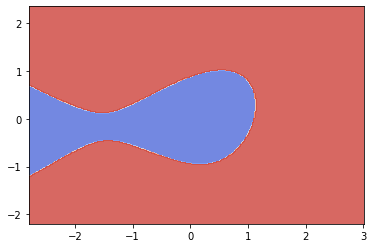

In [20]:
x = pd.DataFrame(X_train)
y = pd.DataFrame(Y_train)
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(x)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model_PCA = SVC(C= 50, gamma= 0.05,verbose=True)
clf = model_PCA.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()